<a href="https://colab.research.google.com/github/duncantanner/Assignments/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2. This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the ./data/sharks.csv data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

In [16]:
!rm -rf wrangling
! git clone https://github.com/DS3001/wrangling

import pandas as pd
import numpy as np

# Part 1, Load the dataset
print( '\n Part 1:')
df_airbnb = pd.read_csv('./wrangling/assignment/data/airbnb_hw.csv', low_memory = False)

print( '\n', df_airbnb.shape, '\n')
print(df_airbnb.head())

price = df_airbnb['Price']
price.unique()

price = price.str.replace(',','') # Remove commas

print('\n', 'Pre-Coercion')
print( price.unique() , '\n')
price = pd.to_numeric(price,errors='coerce') # Price to numeric
print('\n', 'Post-Coercion')
print( price.unique() , '\n')


# Check for missing values
missing_values = df_airbnb['Price'].isnull().sum()
print(f"Missing values in the Price variable: {missing_values}")

#Part 2
print('\n Part 2:')
df = pd.read_csv('./wrangling/assignment/data/sharks.csv', low_memory = False)
df['Type'].value_counts()

type = df['Type']
type = type.replace(['Sea Disaster', 'Watercraft','Boating','Boatomg',],'Boat') #move all under boat
type.value_counts()
type = type.replace(['Invalid', 'Questionable','Unconfirmed','Unverified','Unknown', 'Under investigation'],np.nan) # consolidate unknown values
type.value_counts()

df['Type'] = type
del type
df['Type'].value_counts()

df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace(['UNKNOWN', 'F','M','2017'],np.nan) # All unclean values
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace('y','Y') # All unclean values
pd.crosstab(df['Type'],df['Fatal (Y/N)'],normalize='index')


Cloning into 'wrangling'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 83 (delta 31), reused 11 (delta 11), pack-reused 43
Receiving objects: 100% (83/83), 10.85 MiB | 21.74 MiB/s, done.
Resolving deltas: 100% (36/36), done.

 Part 1:

 (30478, 13) 

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment        

Fatal (Y/N),N,Y
Type,,
Boat,0.684303,0.315697
Provoked,0.967521,0.032479
Unprovoked,0.743871,0.256129


In [15]:
#Part 3

print("Part 3: \n")
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory = False)

df['Pre-release'] = df['WhetherDefendantWasReleasedPretrial']
var = 'Pre-release'
print(df[var].unique(), '\n')
print(df[var].value_counts(), '\n')

df[var] = df[var].fillna('Unknown')
df[var].replace({0: 'Not releassed', 1: 'Released', 9: 'Unknown'}, inplace = True)
print(df[var].value_counts(), '\n')


Part 3: 

[9 0 1] 

1    19154
0     3801
9       31
Name: Pre-release, dtype: int64 

Released         19154
Not releassed     3801
Unknown             31
Name: Pre-release, dtype: int64 



Part 4: 

0     9
1     0
2     1
3     1
4     4
5     0
6     1
7     0
8     1
9     1
10    0
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64
0                     
1                   60
2                   12
3     .985626283367556
4                     
5                   12
6                   36
7                    6
8                   24
9                   12
10    5.91375770020534
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

0.000000     4953
12.000000    1404
0.985626     1051
6.000000      809
3.000000      787
             ... 
49.971253       1
57.034908       1
79.926078       1
42.164271       1
1.657084        1
Name: imposed, Length: 483, dtype: int64 



<Axes: >

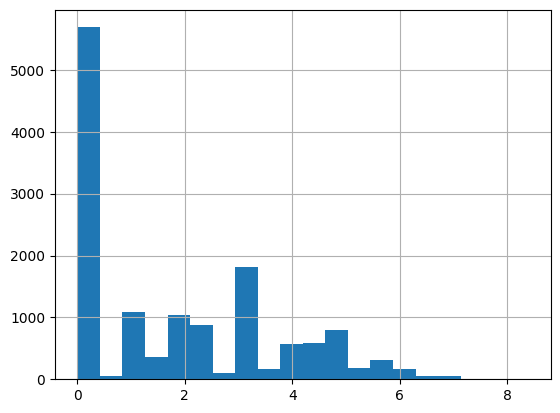

In [14]:
#Part 4
print("Part 4: \n")
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

print(df.loc[0:10,('SentenceTypeAllChargesAtConvictionInContactEvent')])
print(df.loc[0:10,('ImposedSentenceAllChargeInContactEvent')],'\n')

df['imposed'] = df['ImposedSentenceAllChargeInContactEvent']
var = 'imposed'

df[var].replace({' ': '0'}) #replaces null values
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce to numeric
print(df[var].value_counts(), '\n')

df[var] = np.arcsinh(df[var])
df[var].hist(bins = 20)